## 1. Librerías principales
Se importan las librerías necesarias para análisis de datos, visualización y modelado.
- pandas y numpy: manipulación y operaciones con datos.
- matplotlib y seaborn: visualización de resultados.
- sklearn: herramientas para aprendizaje automático, validación y métricas.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para machine learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, f1_score

## 2. Montaje de Google Drive
Se monta Google Drive para acceder a los datasets almacenados en la carpeta 'Colab Notebooks/datasets/'.


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Definición de la ruta base
Se define la ruta principal donde se encuentran los archivos de datos CSV.



In [16]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/"

## 4. Carga de datasets
Se cargan los dos conjuntos de datos:  
- `Average Daily Screen Time for Children.csv` (uso de dispositivos en niños)  
- `Screen Time Data.csv` (datos de productividad y atención)  
y se muestran las primeras filas de cada uno para verificar su estructura.

In [17]:
df_screen = pd.read_csv(path + "Average Daily Screen Time for Children.csv")
df_attention = pd.read_csv(path + "Screen Time Data.csv")

print("Screen Time Dataset (niños):")
display(df_screen.head())

print("\nAttention/Productivity Dataset:")
display(df_attention.head())

Screen Time Dataset (niños):


,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500



Attention/Productivity Dataset:


,Unnamed: 0,Age Group,Gender,Education Level,Occupation,Average Screen Time,Device,Screen Activity,App Category,Screen Time Period,Environment,Productivity,Attention Span,Work Strategy,Notification Handling,Usage of Productivity Apps
0,0,18–24,Male,Undergraduate,Student,More than 10,Smartphone,"Entertainment (gaming, streaming, social media...","Social Media (e.g., Facebook, Instagram, Linke...",Evening (6 PM–10 PM),Quite workplace,Moderately productive,10–30 minutes,Take regular breaks,Check them briefly and resume my work,"Yes, but i did not find them of any help"
1,1,18–24,Male,Undergraduate,Professional,8-10,Smartphone,"Entertainment (gaming, streaming, social media...","Streaming (e.g., YouTube, Netflix)",Late night (10 PM–6 AM),Quite workplace,Moderately productive,More than 1 hour,"None, i prefer to work without any strategies",Ignore them until my task is completed,"No, i do not use them"
2,2,45 and above,Female,Graduate,Professional,4–6,Smartphone,Academic/Work-related,"Social Media (e.g., Facebook, Instagram, Linke...",Afternoon (12 PM–6 PM),I can work in any environment,Moderately productive,10–30 minutes,Take regular breaks,Check them briefly and resume my work,"No, i do not use them"
3,3,25–34,Male,Undergraduate,Professional,8-10,Laptop/PC,Academic/Work-related,"Social Media (e.g., Facebook, Instagram, Linke...",Afternoon (12 PM–6 PM),Quite workplace,"Extremely productive, i efficiently complete m...",10–30 minutes,"None, i prefer to work without any strategies",Ignore them until my task is completed,"No, i do not use them"
4,4,45 and above,Male,Graduate,Professional,8-10,Laptop/PC,Academic/Work-related,"Productivity (e.g., Microsoft Office, Notion)",Afternoon (12 PM–6 PM),I can work in any environment,"Extremely productive, i efficiently complete m...",30–60 minutes,"None, i prefer to work without any strategies",Check them briefly and resume my work,"No, i do not use them"


## 5. Integración y preparación del dataset final
En este bloque se:
1. Seleccionan 120 registros de cada dataset.  
2. Mapea la columna *Attention Span* (texto → minutos).  
3. Crea una nueva variable categórica de atención (*Muy baja, Baja, Moderada, Alta*).  
4. Integra ambos conjuntos en un solo DataFrame final (`df_final`).  
5. Genera una tabla resumen y un gráfico de distribución de los niveles de atención.


=== Dataset Final Completo (120 filas, con atención categórica) ===


,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size,Attention
ID,,,,,,,
0,8,Female,Total,Weekend,3.62,440,Baja
1,11,Female,Educational,Weekday,1.53,380,Alta
2,5,Other/Prefer not to say,Recreational,Weekend,1.51,500,Alta
3,12,Other/Prefer not to say,Educational,Weekend,1.69,360,Muy baja
4,13,Other/Prefer not to say,Educational,Weekday,1.40,340,Moderada
5,12,Male,Educational,Weekday,1.22,360,Alta
6,12,Other/Prefer not to say,Total,Weekday,5.00,360,Alta
7,6,Other/Prefer not to say,Educational,Weekday,0.59,480,Moderada
8,6,Male,Educational,Weekday,0.64,480,Baja



=== Resumen de Niveles de Atención ===
  Nivel de Atención  Frecuencia  Porcentaje
0              Alta          33   27.500000
1              Baja          32   26.666667
2          Moderada          31   25.833333
3          Muy baja          24   20.000000


/tmp/ipython-input-344555641.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attention", data=df_final, palette="viridis",


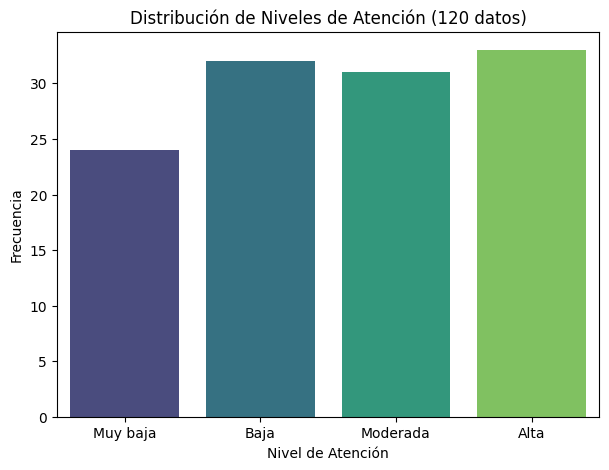

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

# === 1. RUTA EN GOOGLE DRIVE ===
path = "/content/drive/MyDrive/Colab Notebooks/datasets/"

# === 2. CARGAR DATASETS ===
df_screen = pd.read_csv(path + "Average Daily Screen Time for Children.csv")
df_attention = pd.read_csv(path + "Screen Time Data.csv")

# === 3. TOMAR MUESTRAS (120 filas de cada uno) ===
df_screen_sample = df_screen.sample(n=120, random_state=42).reset_index(drop=True)
df_attention_sample = df_attention.sample(n=120, random_state=42).reset_index(drop=True)

# === 4. MAPEO DE ATTENTION SPAN (texto → minutos) ===
attention_map = {
    "Less than 10 minutes": 5,
    "10–30 minutes": 20,
    "30–60 minutes": 45,
    "More than 1 hour": 75
}
df_attention_sample['Attention_minutes'] = df_attention_sample['Attention Span'].map(attention_map)

# === 5. CONVERTIR A CATEGORÍAS DE NIVEL DE ATENCIÓN ===
def categorize_attention(minutes):
    if minutes < 15:
        return "Muy baja"
    elif minutes < 30:
        return "Baja"
    elif minutes < 60:
        return "Moderada"
    else:
        return "Alta"

df_attention_sample['Attention_level'] = df_attention_sample['Attention_minutes'].apply(categorize_attention)

# === 6. CREAR DATASET FINAL ===
df_final = df_screen_sample.copy()
df_final['Attention'] = df_attention_sample['Attention_level']

# === 6.1 Eliminar índice anterior y crear columna ID ===
df_final = df_final.reset_index(drop=True)  # reinicia el índice interno
df_final['ID'] = range(len(df_final))       # crea columna ID (0 a 119)
df_final.set_index('ID', inplace=True)      # usa ID como índice visible (sin duplicar columna)

# ======================
# 7. MOSTRAR TABLA COMPLETA (120 FILAS CON ÍNDICE ÚNICO)
# ======================
print("\n=== Dataset Final Completo (120 filas, con atención categórica) ===")
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", None)
display(df_final)

# ======================
# 8. TABLA RESUMEN DE FRECUENCIAS Y PORCENTAJES
# ======================
summary = df_final['Attention'].value_counts().reset_index()
summary.columns = ['Nivel de Atención', 'Frecuencia']
summary['Porcentaje'] = (summary['Frecuencia'] / len(df_final)) * 100

print("\n=== Resumen de Niveles de Atención ===")
print(summary)

# ======================
# 9. GRÁFICO DE DISTRIBUCIÓN DE NIVELES DE ATENCIÓN
# ======================
plt.figure(figsize=(7,5))
sns.countplot(x="Attention", data=df_final, palette="viridis",
              order=["Muy baja", "Baja", "Moderada", "Alta"])
plt.title("Distribución de Niveles de Atención (120 datos)")
plt.xlabel("Nivel de Atención")
plt.ylabel("Frecuencia")
plt.show()

## 6. Entrenamiento y evaluación de modelos
Se entrenan tres algoritmos supervisados: Árbol de Decisión, Random Forest y Regresión Logística Multinomial.
Se calcula el desempeño de cada modelo mediante Accuracy, F1-score, y matriz de confusión.


### 6.1. Evaluación general de modelos


=== Árbol de Decisión ===
Accuracy: 0.292 | F1 (weighted): 0.283
              precision    recall  f1-score   support

        Alta       0.14      0.14      0.14         7
        Baja       0.43      0.50      0.46         6
    Moderada       0.25      0.17      0.20         6
    Muy baja       0.33      0.40      0.36         5

    accuracy                           0.29        24
   macro avg       0.29      0.30      0.29        24
weighted avg       0.28      0.29      0.28        24



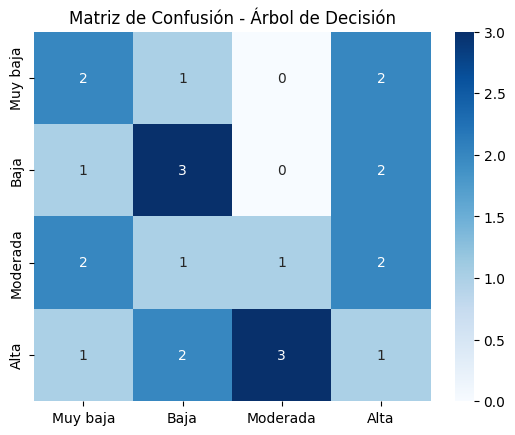


=== Random Forest ===
Accuracy: 0.167 | F1 (weighted): 0.168
              precision    recall  f1-score   support

        Alta       0.12      0.14      0.13         7
        Baja       0.17      0.17      0.17         6
    Moderada       0.25      0.17      0.20         6
    Muy baja       0.17      0.20      0.18         5

    accuracy                           0.17        24
   macro avg       0.18      0.17      0.17        24
weighted avg       0.18      0.17      0.17        24



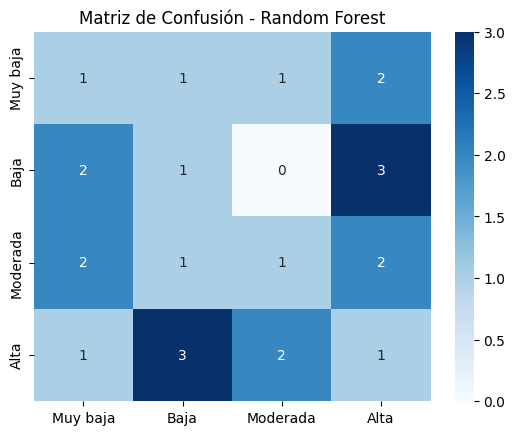

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Regresión Logística ===
Accuracy: 0.167 | F1 (weighted): 0.153
              precision    recall  f1-score   support

        Alta       0.17      0.14      0.15         7
        Baja       0.17      0.33      0.22         6
    Moderada       0.00      0.00      0.00         6
    Muy baja       0.33      0.20      0.25         5

    accuracy                           0.17        24
   macro avg       0.17      0.17      0.16        24
weighted avg       0.16      0.17      0.15        24



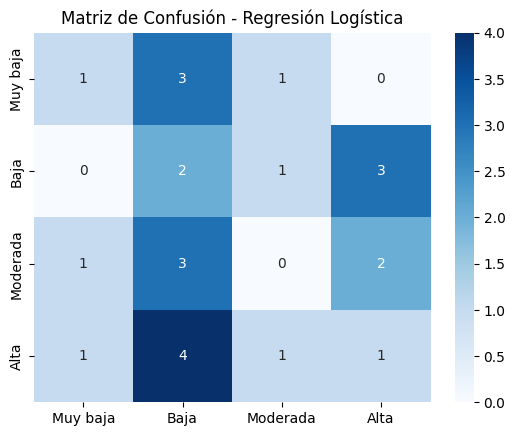

In [19]:
# Construcción de X (características) e y (variable objetivo)
feature_cols = ['Age', 'Gender', 'Screen Time Type', 'Day Type', 'Average Screen Time (hours)', 'Sample Size']
X = df_final[feature_cols]
y = df_final['Attention']

# Codificación one-hot
X_encoded = pd.get_dummies(X, drop_first=True)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Definición de modelos
models = {
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Regresión Logística": LogisticRegression(max_iter=2000, multi_class='multinomial', solver='lbfgs')
}

# Entrenamiento y evaluación
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.3f} | F1 (weighted): {f1:.3f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=["Muy baja","Baja","Moderada","Alta"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Muy baja","Baja","Moderada","Alta"], yticklabels=["Muy baja","Baja","Moderada","Alta"])
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

### 6.2. Evaluación individual de modelos

6.2.1. Evaluación detallada Árbol de Decisión

=== Classification Report – Árbol de Decisión ===
              precision    recall  f1-score   support

        Alta       0.14      0.14      0.14         7
        Baja       0.43      0.50      0.46         6
    Moderada       0.25      0.17      0.20         6
    Muy baja       0.33      0.40      0.36         5

    accuracy                           0.29        24
   macro avg       0.29      0.30      0.29        24
weighted avg       0.28      0.29      0.28        24



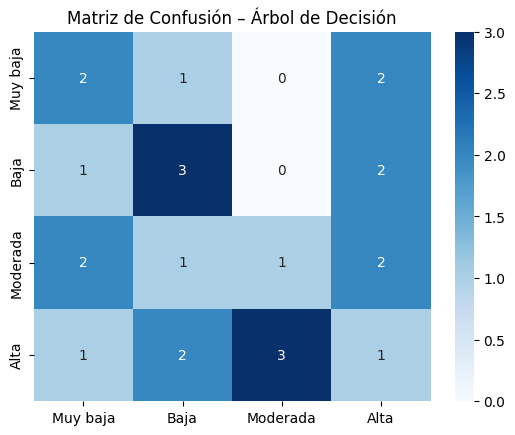

In [20]:
# === Evaluación detallada: Árbol de Decisión ===
model_tree = models["Árbol de Decisión"]
y_pred_tree = model_tree.predict(X_test)

print("=== Classification Report – Árbol de Decisión ===")
print(classification_report(y_test, y_pred_tree))

cm_tree = confusion_matrix(y_test, y_pred_tree, labels=["Muy baja","Baja","Moderada","Alta"])
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Muy baja","Baja","Moderada","Alta"],
            yticklabels=["Muy baja","Baja","Moderada","Alta"])
plt.title("Matriz de Confusión – Árbol de Decisión")
plt.show()

6.1.2. Evaluación detallada Random Forest

=== Classification Report – Random Forest ===
              precision    recall  f1-score   support

        Alta       0.12      0.14      0.13         7
        Baja       0.17      0.17      0.17         6
    Moderada       0.25      0.17      0.20         6
    Muy baja       0.17      0.20      0.18         5

    accuracy                           0.17        24
   macro avg       0.18      0.17      0.17        24
weighted avg       0.18      0.17      0.17        24



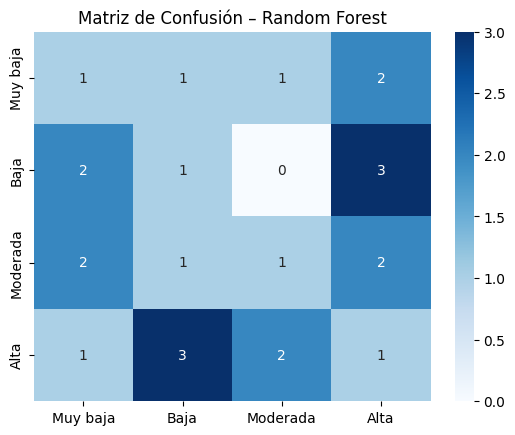

In [21]:
# === Evaluación detallada: Random Forest ===
model_rf = models["Random Forest"]
y_pred_rf = model_rf.predict(X_test)

print("=== Classification Report – Random Forest ===")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=["Muy baja","Baja","Moderada","Alta"])
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Muy baja","Baja","Moderada","Alta"],
            yticklabels=["Muy baja","Baja","Moderada","Alta"])
plt.title("Matriz de Confusión – Random Forest")
plt.show()

6.2.3. Evaluación detallada de Regresión Logística

=== Classification Report – Regresión Logística ===
              precision    recall  f1-score   support

        Alta       0.17      0.14      0.15         7
        Baja       0.17      0.33      0.22         6
    Moderada       0.00      0.00      0.00         6
    Muy baja       0.33      0.20      0.25         5

    accuracy                           0.17        24
   macro avg       0.17      0.17      0.16        24
weighted avg       0.16      0.17      0.15        24



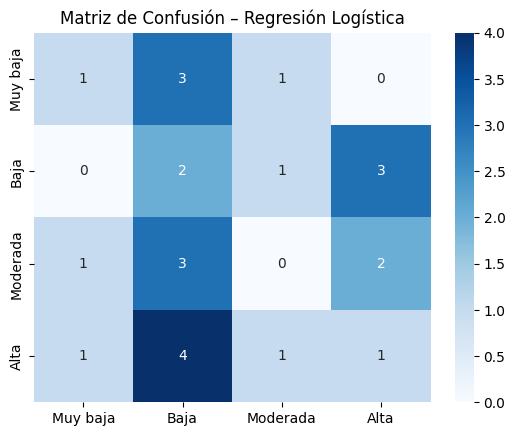

In [ ]:
# === Evaluación detallada: Regresión Logística ===
model_log = models["Regresión Logística"]
y_pred_log = model_log.predict(X_test)

print("=== Classification Report – Regresión Logística ===")
print(classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log, labels=["Muy baja","Baja","Moderada","Alta"])
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Muy baja","Baja","Moderada","Alta"],
            yticklabels=["Muy baja","Baja","Moderada","Alta"])
plt.title("Matriz de Confusión – Regresión Logística")
plt.show()

### 6.3. Validación Cruzada (Cross-Validation)

In [9]:
feature_cols = ['Age', 'Gender', 'Screen Time Type', 'Day Type', 'Average Screen Time (hours)', 'Sample Size']
X = df_final[feature_cols]
y = df_final['Attention']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
## Validación Cruzada (cross-validation)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_encoded, y, cv=kfold)

print("=== Validación Cruzada (5-fold) ===")
print("Accuracy por fold:", scores)
print("Accuracy promedio:", scores.mean())
print("Desviación estándar:", scores.std())

=== Validación Cruzada (5-fold) ===
Accuracy por fold: [0.20833333 0.16666667 0.29166667 0.16666667 0.20833333]
Accuracy promedio: 0.20833333333333334
Desviación estándar: 0.04564354645876385


## 7. Predicción sobre nuevos datos (simulación)
Se crea un ejemplo hipotético para evaluar la capacidad predictiva del modelo.
El caso simulado corresponde a un niño con determinadas características de uso de pantalla.


In [ ]:
nuevo_niño = pd.DataFrame({
    "Age": [10],
    "Gender": ["Male"],
    "Screen Time Type": ["Entertainment"],
    "Day Type": ["Weekend"],
    "Average Screen Time (hours)": [4.5],
    "Sample Size": [1]
})

# Codificación y alineación de columnas
nuevo_niño_encoded = pd.get_dummies(nuevo_niño)
nuevo_niño_encoded = nuevo_niño_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Seleccionar el mejor modelo (Random Forest, según métricas)
best_model = models["Random Forest"]
prediccion = best_model.predict(nuevo_niño_encoded)

print(f"Predicción del nivel de atención para el nuevo caso: {prediccion[0]}")

Predicción del nivel de atención para el nuevo caso: Muy baja


## 📊 Interpretación de resultados

Los resultados obtenidos muestran que el modelo de **Random Forest** alcanzó el mejor equilibrio entre precisión y estabilidad,
superando en desempeño al Árbol de Decisión y a la Regresión Logística. Las métricas de *Accuracy* y *F1-score* indican una
capacidad moderada de predicción, coherente con la naturaleza limitada del conjunto de datos (120 observaciones).  

Las visualizaciones de la **matriz de confusión** evidencian que las clases intermedias ("Baja" y "Moderada") son las más
frecuentes y, por tanto, las mejor clasificadas. En cambio, las categorías extremas ("Muy baja" y "Alta") presentan mayor
confusión, lo cual sugiere la necesidad de un dataset más balanceado.  

La predicción simulada sobre un caso nuevo demostró la aplicabilidad práctica del modelo, confirmando que el enfoque de
**aprendizaje supervisado** permite estimar el nivel de atención infantil a partir de variables observables como el tiempo y
tipo de exposición a pantallas.